## <u>Part One - PROJECT BASED </u>

• <b>DOMAIN:</b> Electronics and Telecommunication 

• <b>CONTEXT:</b> A communications equipment manufacturing company has a product which is responsible for emitting informative signals. Company wants to build a
machine learning model which can help the company to predict the equipment’s signal quality using various parameters.

• <b>DATA DESCRIPTION:</b> The data set contains information on various signal tests performed:
 
 1. Parameters: Various measurable signal parameters.
 2. Signal_Quality: Final signal strength or quality.

• <b>PROJECT OBJECTIVE:</b> The need is to build a regressor which can use these parameters to determine the signal strength or quality [as number].

<b>Steps and tasks: </b>

1. Import data.
2. Data analysis & visualisation<br>
    • Perform relevant and detailed statistical analysis on the data.<br>
    • Perform relevant and detailed uni, bi and multi variate analysis.
<br><b>Hint:</b> Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better analysis. Create your own features if
required. Be highly experimental and analytical here to find relevant hidden patterns.
3. Design, train, tune and test a neural network regressor.
<br><b>Hint:</b> Use best approach to refine and tune the data or the model. Be highly experimental here.
4. Pickle the model for future use.

<br>

### <u>Solution</u>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import data

In [2]:
#import libraries
#%tensorflow_version 2.x
import tensorflow 
tensorflow.__version__

'2.7.0'

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model

In [4]:
#Initialize random number generator
import random
random.seed(0)
#Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
#importing the datset
signal_df = pd.read_csv('/content/drive/MyDrive/Part- 1 - Signal.csv')

In [6]:
signal_df.head(10)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


**Data Analysis and Visualisation**

In [7]:
print(signal_df.shape)
print(signal_df.size)

(1599, 12)
19188


It has 1599 rows and 12 columns of data

In [8]:
signal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


From above we can see there are no null values and every column except 'signal strength' is of float type and from the sample data we confiremed they are of float type. So we can conclude there might not be null values present.

In [9]:
#Now lets look at the 5 point summary
signal_df.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Out of all parameters, parameter7 has the highest mean and parameter 5 has the lowest.
Parameter1 might have small skewness/outliers, more data in first quartile.Parameter3 has range 0 to 1.Parameter5 has range less than 1, might have possible skewness.Parameter6 has range 1 to 72,expect outliers.Parameter7 has a range of 6 to 289.Parameter8 has lowest standard deviation. We can see the category starts with 3 and ends with 8

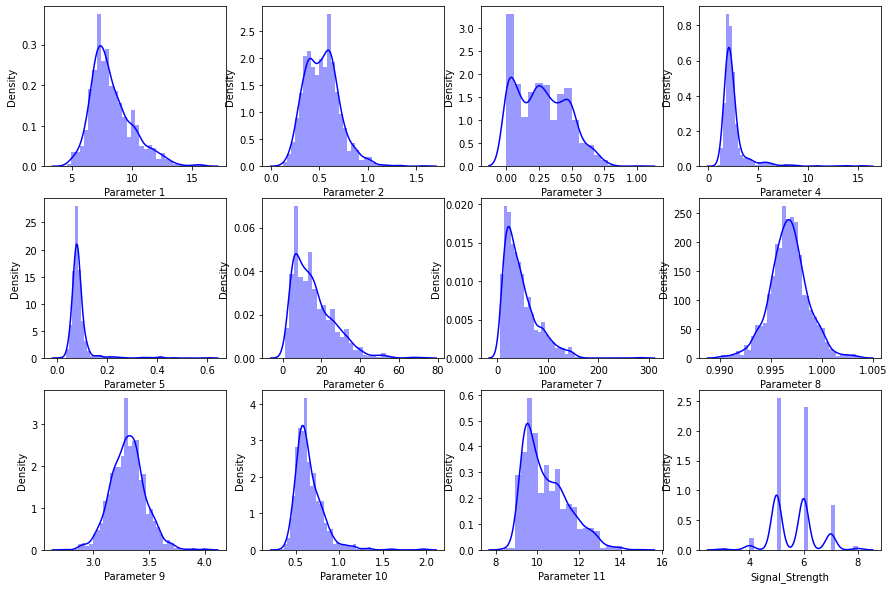

In [10]:
#Lets visualize the distribtuions explained above
plt.figure(figsize=(15,10))
cols = list(signal_df)
t=1
for i in cols:
    plt.subplot(3,4,t)
    sns.distplot(signal_df[i], color = 'blue')
    t += 1

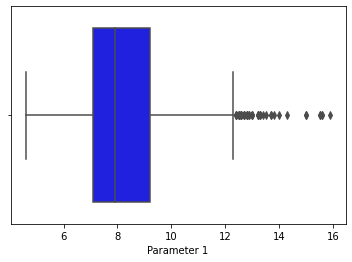

Boxplot of  Parameter 1
Q1 is :  7.1
Q2 is :  7.9
Q3 is :  9.2
IQR is: 2.0999999999999996
Lower Whisker: 3.95 	Upper Whisker : 12.349999999999998
Number of outliers are: 49


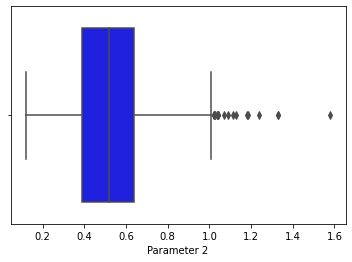

Boxplot of  Parameter 2
Q1 is :  0.39
Q2 is :  0.52
Q3 is :  0.64
IQR is: 0.25
Lower Whisker: 0.015000000000000013 	Upper Whisker : 1.0150000000000001
Number of outliers are: 19


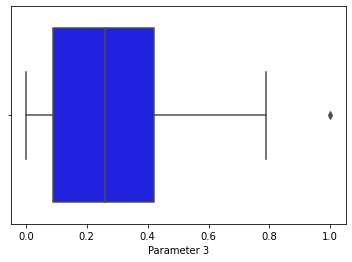

Boxplot of  Parameter 3
Q1 is :  0.09
Q2 is :  0.26
Q3 is :  0.42
IQR is: 0.32999999999999996
Lower Whisker: -0.4049999999999999 	Upper Whisker : 0.9149999999999999
Number of outliers are: 1


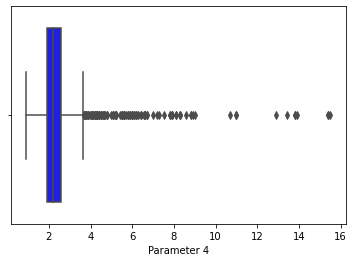

Boxplot of  Parameter 4
Q1 is :  1.9
Q2 is :  2.2
Q3 is :  2.6
IQR is: 0.7000000000000002
Lower Whisker: 0.8499999999999996 	Upper Whisker : 3.6500000000000004
Number of outliers are: 155


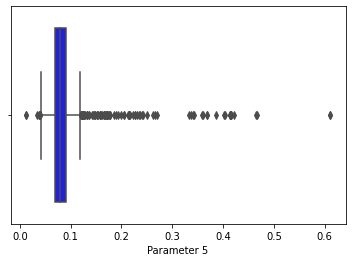

Boxplot of  Parameter 5
Q1 is :  0.07
Q2 is :  0.079
Q3 is :  0.09
IQR is: 0.01999999999999999
Lower Whisker: 0.04000000000000002 	Upper Whisker : 0.11999999999999998
Number of outliers are: 112


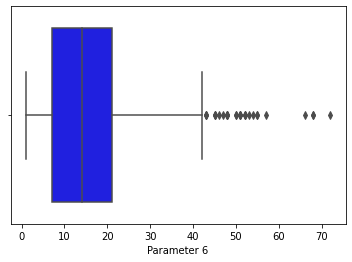

Boxplot of  Parameter 6
Q1 is :  7.0
Q2 is :  14.0
Q3 is :  21.0
IQR is: 14.0
Lower Whisker: -14.0 	Upper Whisker : 42.0
Number of outliers are: 30


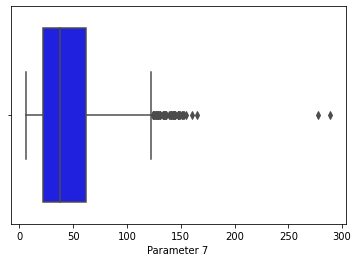

Boxplot of  Parameter 7
Q1 is :  22.0
Q2 is :  38.0
Q3 is :  62.0
IQR is: 40.0
Lower Whisker: -38.0 	Upper Whisker : 122.0
Number of outliers are: 55


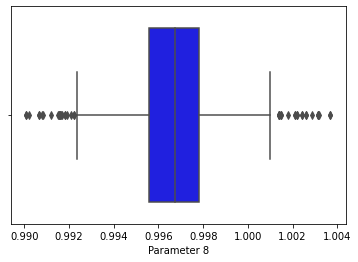

Boxplot of  Parameter 8
Q1 is :  0.9956
Q2 is :  0.99675
Q3 is :  0.9978349999999999
IQR is: 0.002234999999999876
Lower Whisker: 0.9922475000000002 	Upper Whisker : 1.0011874999999997
Number of outliers are: 45


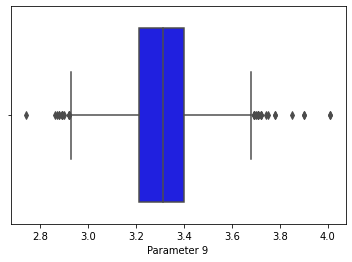

Boxplot of  Parameter 9
Q1 is :  3.21
Q2 is :  3.31
Q3 is :  3.4
IQR is: 0.18999999999999995
Lower Whisker: 2.925 	Upper Whisker : 3.6849999999999996
Number of outliers are: 35


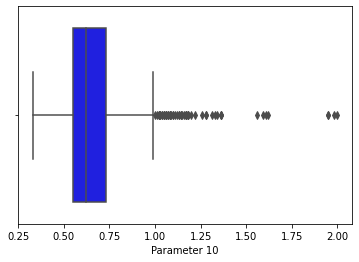

Boxplot of  Parameter 10
Q1 is :  0.55
Q2 is :  0.62
Q3 is :  0.73
IQR is: 0.17999999999999994
Lower Whisker: 0.28000000000000014 	Upper Whisker : 0.9999999999999999
Number of outliers are: 59


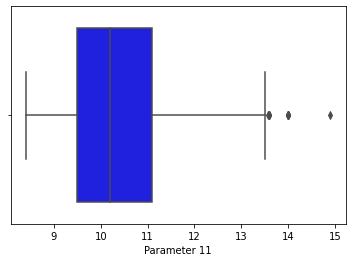

Boxplot of  Parameter 11
Q1 is :  9.5
Q2 is :  10.2
Q3 is :  11.1
IQR is: 1.5999999999999996
Lower Whisker: 7.1000000000000005 	Upper Whisker : 13.5
Number of outliers are: 13


In [11]:
 #calculating the outiers in each attribute 
for i in cols[:-1]: 
    sns.boxplot(x= signal_df[i], color='blue')
    plt.show()
    print('Boxplot of ',i)
    Q1 = signal_df[i].quantile(0.25)
    Q2 = signal_df[i].quantile(0.50)
    Q3 = signal_df[i].quantile(0.75) 
    IQR = Q3 - Q1
    L_W = (Q1 - 1.5 *IQR)
    U_W = (Q3 + 1.5 *IQR)    
    print('Q1 is : ',Q1)
    print('Q2 is : ',Q2)
    print('Q3 is : ',Q3)
    print('IQR is:',IQR)
    print('Lower Whisker:',L_W,'\tUpper Whisker :',U_W)
    bools = (signal_df[i] < (Q1 - 1.5 *IQR)) |(signal_df[i] > (Q3 + 1.5 * IQR))
    print( 'Number of outliers are:',bools.sum())  

Here we can see skewness and outliers in almostn every columns. Also we can confirm that Signal Strength is a classification variable. From above we can see that Parameter4 has the highest number of outliers. We need to deal it.

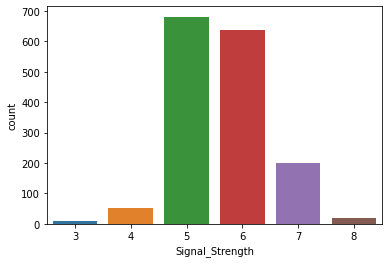

In [12]:
#Since Signal Strength is a classification variable, we can check the distribution
sns.countplot(signal_df['Signal_Strength'])

Here we can see the classification ranges from 3 to 8. Classification 5 has the highest count,whereas class 3 has the lowest

In [13]:
#We are replacing the outliers with their median
for i in cols[:-1]:
    q1 = signal_df[i].quantile(0.25)
    q3 = signal_df[i].quantile(0.75)
    iqr = q3 - q1
    lowerq = q1-1.5*iqr
    higherq =  q3+1.5 *iqr
    signal_df.loc[(signal_df[i] < lowerq) | (signal_df[i] > higherq), i] = signal_df[i].median()

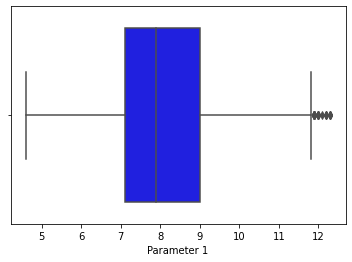

Boxplot of  Parameter 1
Q1 is :  7.1
Q2 is :  7.9
Q3 is :  9.0
IQR is: 1.9000000000000004
Lower Whisker: 4.249999999999999 	Upper Whisker : 11.850000000000001
Number of outliers are: 29


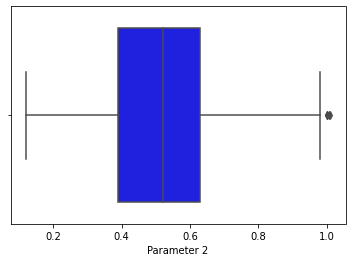

Boxplot of  Parameter 2
Q1 is :  0.39
Q2 is :  0.52
Q3 is :  0.63
IQR is: 0.24
Lower Whisker: 0.030000000000000027 	Upper Whisker : 0.99
Number of outliers are: 5


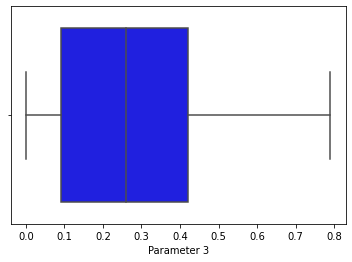

Boxplot of  Parameter 3
Q1 is :  0.09
Q2 is :  0.26
Q3 is :  0.42
IQR is: 0.32999999999999996
Lower Whisker: -0.4049999999999999 	Upper Whisker : 0.9149999999999999
Number of outliers are: 0


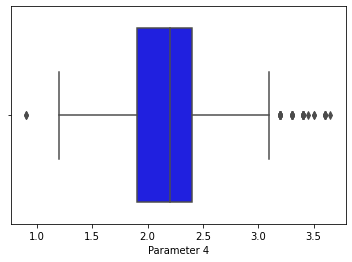

Boxplot of  Parameter 4
Q1 is :  1.9
Q2 is :  2.2
Q3 is :  2.4
IQR is: 0.5
Lower Whisker: 1.15 	Upper Whisker : 3.15
Number of outliers are: 55


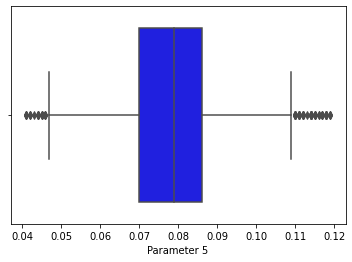

Boxplot of  Parameter 5
Q1 is :  0.07
Q2 is :  0.079
Q3 is :  0.086
IQR is: 0.015999999999999986
Lower Whisker: 0.04600000000000003 	Upper Whisker : 0.10999999999999997
Number of outliers are: 76


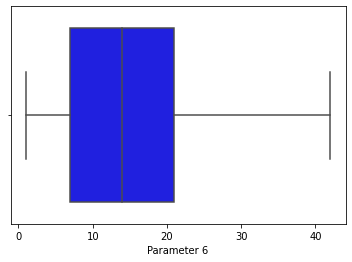

Boxplot of  Parameter 6
Q1 is :  7.0
Q2 is :  14.0
Q3 is :  21.0
IQR is: 14.0
Lower Whisker: -14.0 	Upper Whisker : 42.0
Number of outliers are: 0


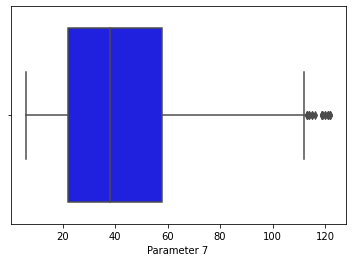

Boxplot of  Parameter 7
Q1 is :  22.0
Q2 is :  38.0
Q3 is :  58.0
IQR is: 36.0
Lower Whisker: -32.0 	Upper Whisker : 112.0
Number of outliers are: 25


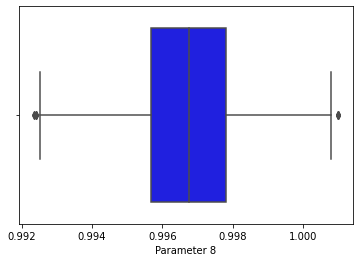

Boxplot of  Parameter 8
Q1 is :  0.9956799999999999
Q2 is :  0.99675
Q3 is :  0.9978
IQR is: 0.002120000000000122
Lower Whisker: 0.9924999999999997 	Upper Whisker : 1.0009800000000002
Number of outliers are: 13


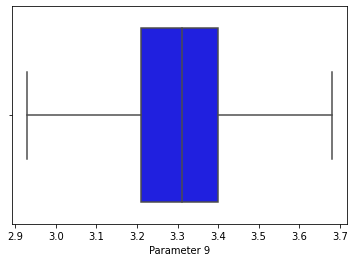

Boxplot of  Parameter 9
Q1 is :  3.21
Q2 is :  3.31
Q3 is :  3.4
IQR is: 0.18999999999999995
Lower Whisker: 2.925 	Upper Whisker : 3.6849999999999996
Number of outliers are: 0


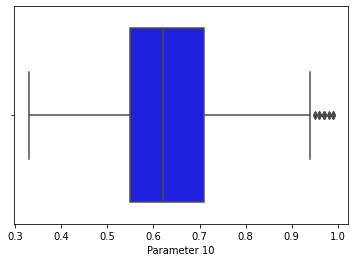

Boxplot of  Parameter 10
Q1 is :  0.55
Q2 is :  0.62
Q3 is :  0.71
IQR is: 0.15999999999999992
Lower Whisker: 0.31000000000000016 	Upper Whisker : 0.9499999999999998
Number of outliers are: 16


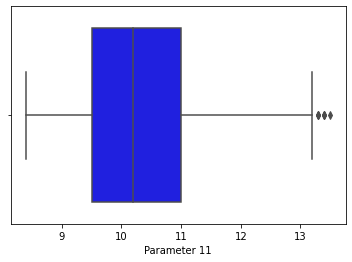

Boxplot of  Parameter 11
Q1 is :  9.5
Q2 is :  10.2
Q3 is :  11.0
IQR is: 1.5
Lower Whisker: 7.25 	Upper Whisker : 13.25
Number of outliers are: 7


In [14]:
 #calculating the outiers after imputation
for i in cols[:-1]: 
    sns.boxplot(x= signal_df[i], color='blue')
    plt.show()
    print('Boxplot of ',i)
    Q1 = signal_df[i].quantile(0.25)
    Q2 = signal_df[i].quantile(0.50)
    Q3 = signal_df[i].quantile(0.75) 
    IQR = Q3 - Q1
    L_W = (Q1 - 1.5 *IQR)
    U_W = (Q3 + 1.5 *IQR)    
    print('Q1 is : ',Q1)
    print('Q2 is : ',Q2)
    print('Q3 is : ',Q3)
    print('IQR is:',IQR)
    print('Lower Whisker:',L_W,'\tUpper Whisker :',U_W)
    bools = (signal_df[i] < (Q1 - 1.5 *IQR)) |(signal_df[i] > (Q3 + 1.5 * IQR))
    print( 'Number of outliers are:',bools.sum())  

We were able to remove outliers to an extent.

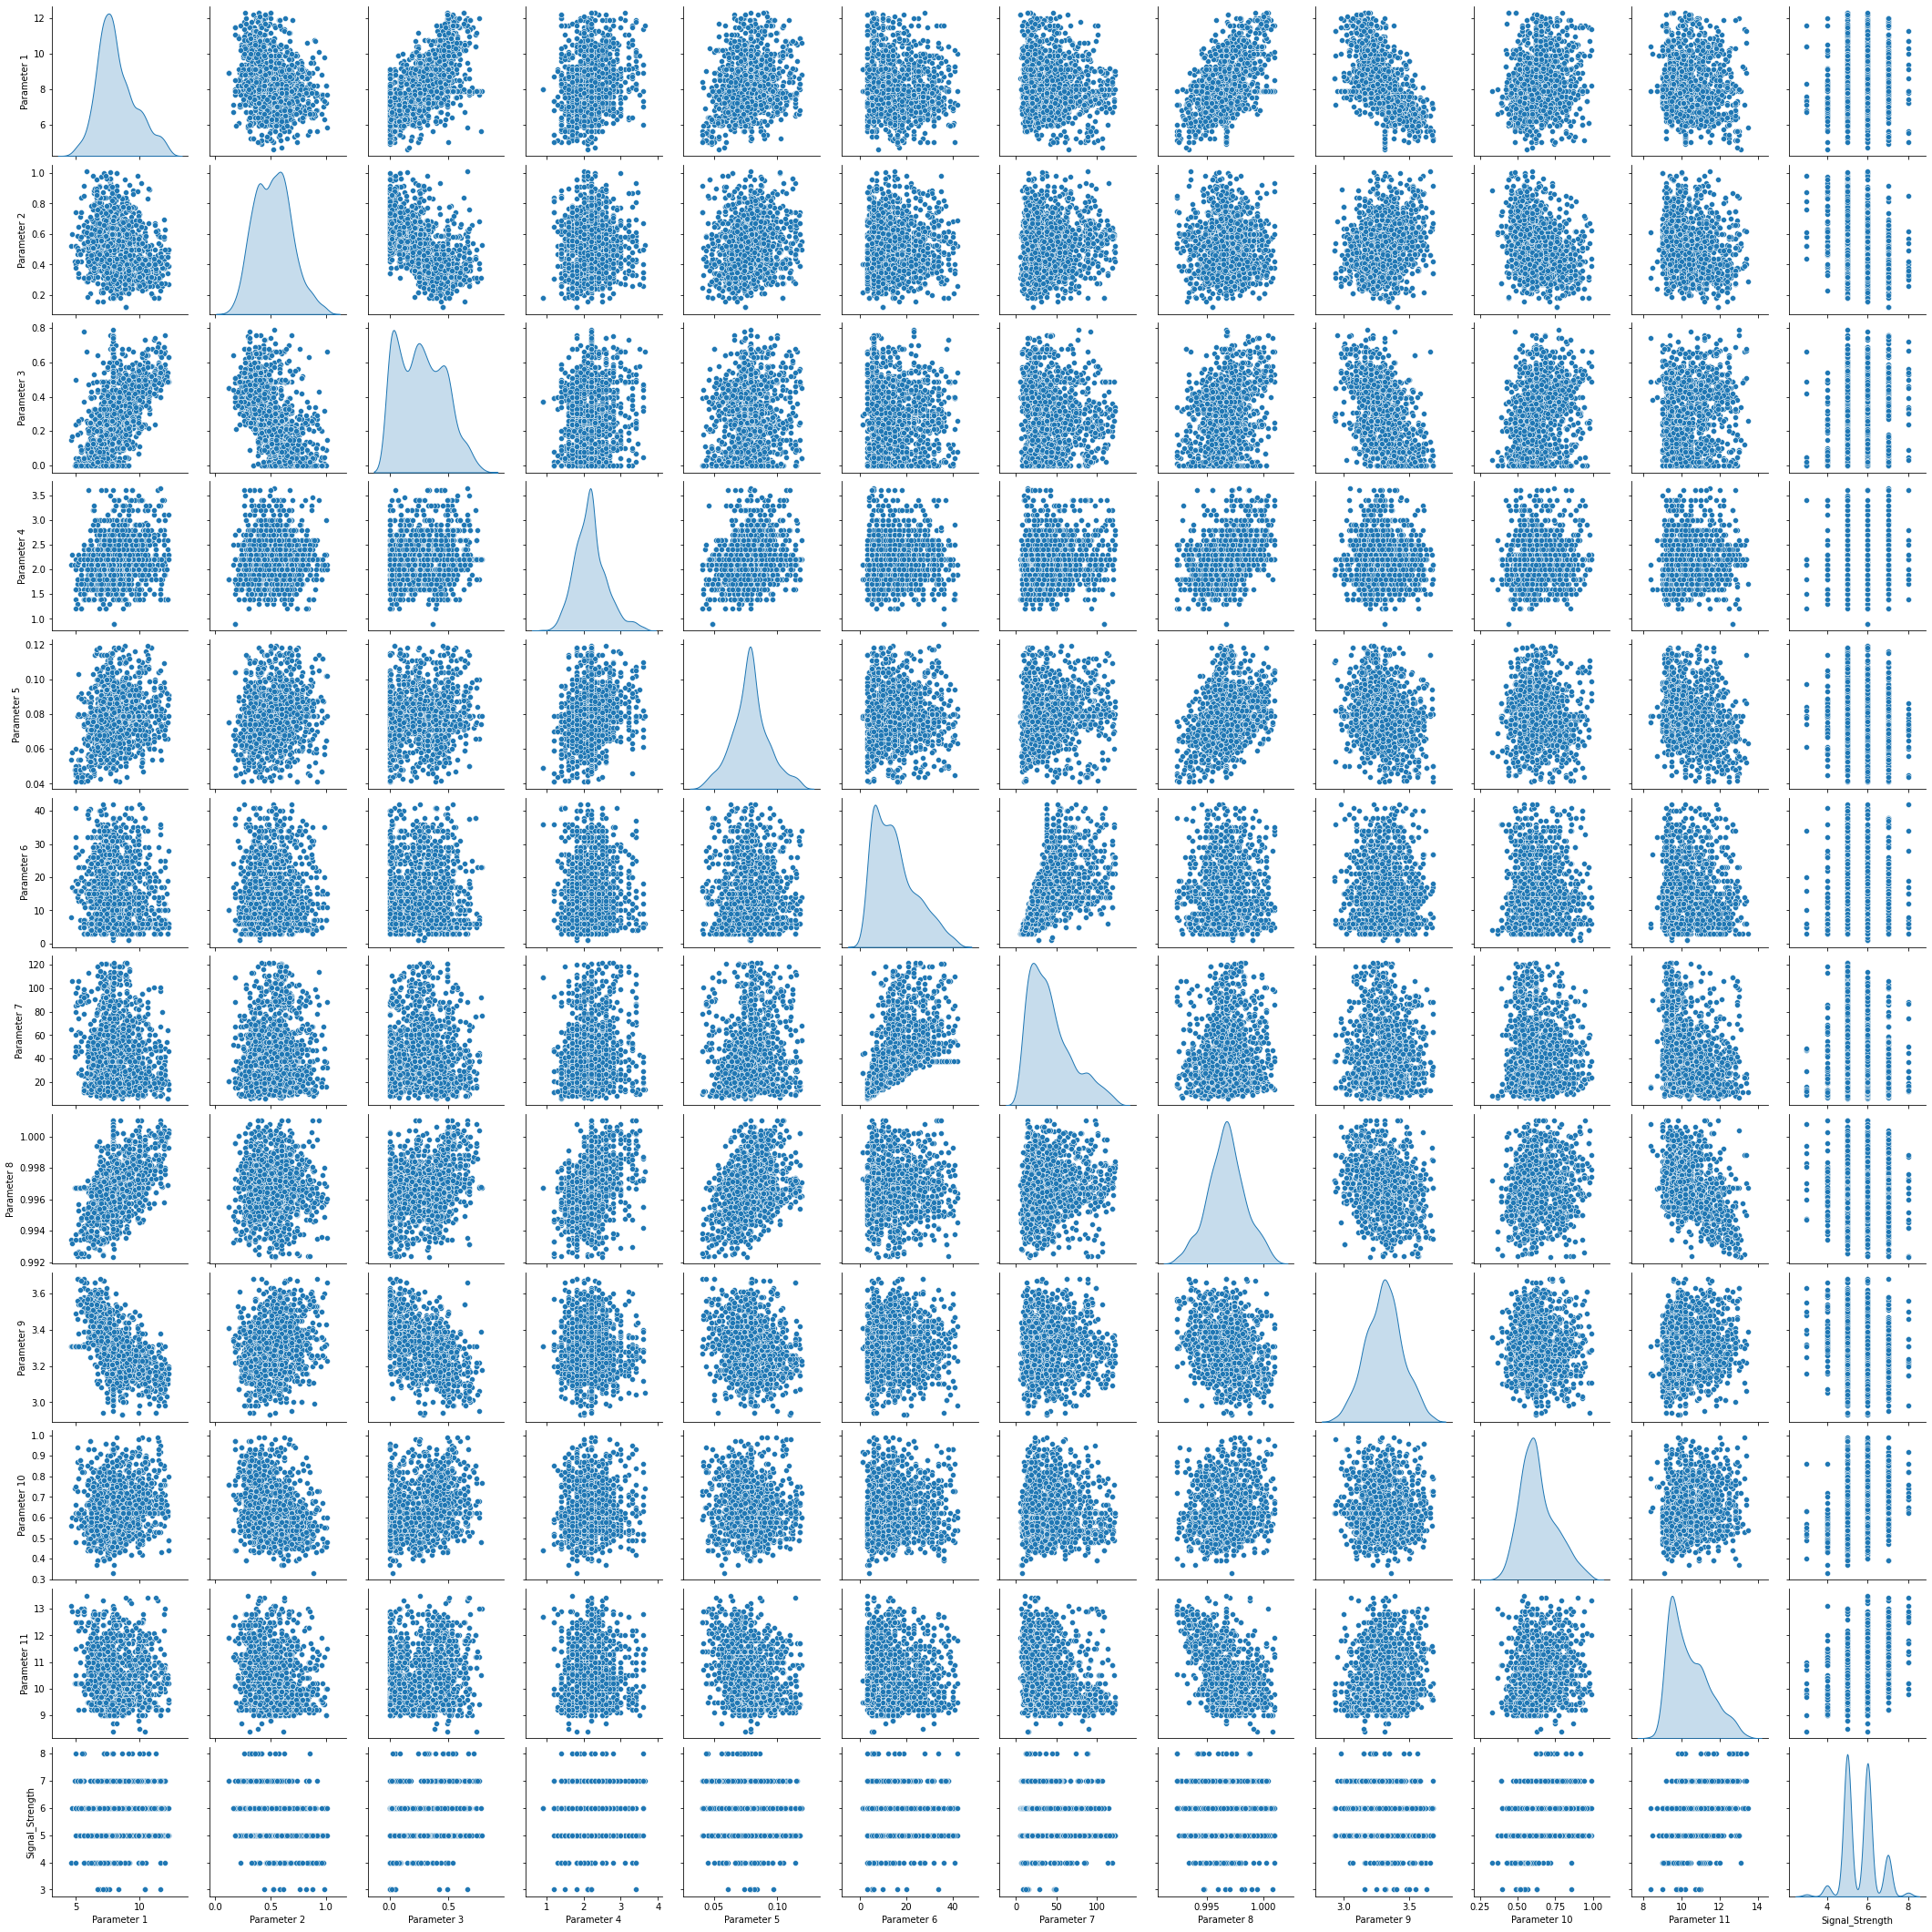

In [15]:
#Pairplot gives a good visualisation between the realtion of each attributes.
sns.pairplot(signal_df,diag_kind='kde')

In [16]:
#Lets check the correlation
corr = signal_df.corr()
corr

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
Parameter 1,1.000000,-0.258476,0.608682,0.225436,0.227814,-0.145813,-0.113789,0.557213,-0.596539,0.176282,-0.048917,0.109637
Parameter 2,-0.258476,1.000000,-0.564257,0.018550,0.138565,0.004853,0.090253,0.000445,0.225681,-0.315552,-0.214283,-0.356247
Parameter 3,0.608682,-0.564257,1.000000,0.156708,0.091785,-0.060658,-0.010996,0.338521,-0.527095,0.277967,0.129530,0.232209
Parameter 4,0.225436,0.018550,0.156708,1.000000,0.229396,0.040756,0.126300,0.372047,-0.064925,0.063026,0.082817,0.035506
Parameter 5,0.227814,0.138565,0.091785,0.229396,1.000000,-0.006299,0.099765,0.375573,-0.184304,-0.059988,-0.260942,-0.162122
Parameter 6,-0.145813,0.004853,-0.060658,0.040756,-0.006299,1.000000,0.596640,-0.018912,0.087431,0.025085,-0.074064,-0.047187
Parameter 7,-0.113789,0.090253,-0.010996,0.126300,0.099765,0.596640,1.000000,0.112545,0.001748,-0.035280,-0.234335,-0.168010
Parameter 8,0.557213,0.000445,0.338521,0.372047,0.375573,-0.018912,0.112545,1.000000,-0.263005,0.120295,-0.472356,-0.164179
Parameter 9,-0.596539,0.225681,-0.527095,-0.064925,-0.184304,0.087431,0.001748,-0.263005,1.000000,-0.021699,0.137582,-0.075837
Parameter 10,0.176282,-0.315552,0.277967,0.063026,-0.059988,0.025085,-0.035280,0.120295,-0.021699,1.000000,0.211820,0.385729


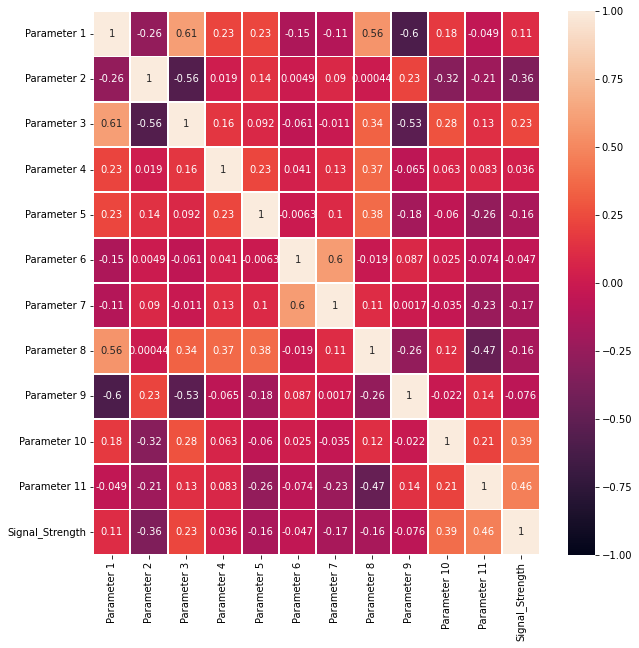

In [17]:
#Lets visualize it using heatmap
fig, ax = plt.subplots(figsize=(10,10))        
sns.heatmap(corr,annot=True,vmin=-1,vmax=1,linewidths=1,ax=ax)
#Heat map of correlation

From above we can observe a correlation of Parameter1 with Parameter3 & Parameter8. There is also good correlation between Parameter6 & Parameter7.But these are small relations, need not to consider.

**Design,train, tune and test a neural network regressor**

In [18]:
X= signal_df.drop('Signal_Strength',axis=1)
y= signal_df['Signal_Strength']

In [19]:
#Spliting data into train and test
X_Ftrain,X_test,y_Ftrain,y_test = train_test_split(X,y,test_size=30, random_state=10)

In [20]:
X_Ftrain.shape

(1569, 11)

In [21]:
#Now need to split the training and validation data
X_train,X_val,y_train,y_val = train_test_split(X_Ftrain,y_Ftrain,test_size=20,random_state=0)

In [22]:
X_train.shape

(1549, 11)

In [23]:
#Initializing Sequential Model
model = tensorflow.keras.models.Sequential()
#Normalizing input data
model.add(tensorflow.keras.layers.BatchNormalization(input_shape=(11,)))
#Now we need to add final Dense layer for prediction, weights and bias will be automatically declared
model.add(tensorflow.keras.layers.Dense(1))

In [24]:
#Lets Compile our model by specifying loss function and optimizer
model.compile(optimizer='sgd',loss='mse')

In [25]:
#Fit our model
model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=100,batch_size=20)

Epoch 1/100
78/78 [==============================] - 3s 6ms/step - loss: 4.8003 - val_loss: 1.3491
Epoch 2/100
78/78 [==============================] - 0s 4ms/step - loss: 0.9449 - val_loss: 1.4142
Epoch 3/100
78/78 [==============================] - 0s 3ms/step - loss: 0.6850 - val_loss: 0.6540
Epoch 4/100
78/78 [==============================] - 0s 4ms/step - loss: 0.6055 - val_loss: 0.3621
Epoch 5/100
78/78 [==============================] - 0s 3ms/step - loss: 0.5466 - val_loss: 0.3295
Epoch 6/100
78/78 [==============================] - 0s 4ms/step - loss: 0.5167 - val_loss: 0.2933
Epoch 7/100
78/78 [==============================] - 0s 4ms/step - loss: 0.5193 - val_loss: 0.2898
Epoch 8/100
78/78 [==============================] - 0s 4ms/step - loss: 0.4976 - val_loss: 0.2888
Epoch 9/100
78/78 [==============================] - 0s 4ms/step - loss: 0.4838 - val_loss: 0.3082
Epoch 10/100
78/78 [==============================] - 0s 3ms/step - loss: 0.4794 - val_loss: 0.3464
Epoch 11/

**Pickle the model**

In [26]:
model.save("model_signal.h5")


In [27]:
#Load the model
signal_model = load_model('model_signal.h5')

In [28]:
#Predict using test data
y_predict = signal_model.predict(X_test)

In [29]:
y_predict[0:5]

array([[5.643561 ],
       [5.1875563],
       [5.5125217],
       [5.530447 ],
       [5.322217 ]], dtype=float32)

In [30]:
y_test.head()

1518    5
1246    5
544     6
1343    6
428     5
Name: Signal_Strength, dtype: int64

Here we can see our outputs are close

In [31]:
score =r2_score(y_test,y_predict)
print(score)

0.3916004613317151


In [32]:
signal_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 11)               44        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1)                 12        
                                                                 
Total params: 56
Trainable params: 34
Non-trainable params: 22
_________________________________________________________________


## <u>Part Two - PROJECT BASED </u>

• <b>DOMAIN:</b> Autonomous Vehicles 

• <b>BUSINESS CONTEXT:</b> A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic
example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic
images.
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address
helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest
to the optical character recognition community.
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This
difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character
arrangements.
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition
factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain
some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

• <b>DATA DESCRIPTION:</b> : The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on
data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained
from house numbers in Google Street View images.
Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.The dataset has been provided in the form of h5py files.

• <b>PROJECT OBJECTIVE:</b> : We will build a digit classifier on the SVHN (Street View Housing Number) dataset.

<b>Steps and tasks: </b>

1. Import data.
2. Data pre-processing and visualisation.
3. Design, train, tune and test a neural network image classifier.<br>
<b>Hint:</b> Use best approach to refine and tune the data or the model. Be highly experimental here to get the best accuracy out of the model.
4. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

### <u>Solution</u>

**Import the data**

In [33]:
#Since our file is in .h5 file we need to import h5py package
import h5py
auto_df = h5py.File('/content/drive/MyDrive/Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5','r')
print(auto_df.keys())

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


**Data pre-processing and visualisation**

In [34]:
#Storing the data keys
X_train = auto_df['X_train'][:]
y_train = auto_df['y_train'][:]
X_test = auto_df['X_test'][:]
y_test = auto_df['y_test'][:]

In [35]:
print(X_train.shape)
X_train[0:1]

(42000, 32, 32)


array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
          42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
          84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
         115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
          26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
          30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
          53.0377]]], dtype=float32)

In [36]:
print(X_test.shape)
X_train[0:1]

(18000, 32, 32)


array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
          42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
          84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
         115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
          26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
          30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
          53.0377]]], dtype=float32)

In [37]:
print(y_train.shape)
y_train[0:1]

(42000,)


array([2], dtype=uint8)

In [38]:
print(y_test.shape)
y_test[0:1]

(18000,)


array([1], dtype=uint8)

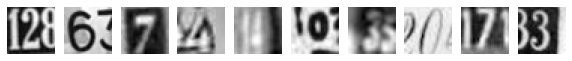

Labels for the images above : [2 6 7 4 4 0 3 0 7 3]


In [39]:
#Lets visualize some samples images with their labels
plt.figure(figsize=(10,1))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(X_train[i],cmap='gray')
  plt.axis("off")
plt.show()  
#Printing the labels  
print('Labels for the images above : %s'%(y_train[0:10]))

We can see the training set contains 42000 images of size 32x32. The above images labels the prominent numbers. We can see the X_test and X_train have3D shape, we need to reshape it so it can be fed into our model.

In [40]:
#Reshaping
X_train = X_train.reshape(42000,1024,1)
X_test = X_test.reshape(18000,1024,1)

#Need to normalize our data. For that we have to divide it with 255 since our data is of Grayscale
X_train = X_train / 255.0
X_test = X_test / 255.0
print('New Training set', X_train.shape, y_train.shape)
print('New Test set', X_test.shape, y_test.shape)

New Training set (42000, 1024, 1) (42000,)
New Test set (18000, 1024, 1) (18000,)


We need to convert our target value to categorical type using one hot encode for our loss function.

In [41]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
#After convertion lets check the number of classes present
print("The number of classes :",y_test.shape[1]) #0 to9

The number of classes : 10


**Design, train, tune and test a neural network image classifier**

In [42]:
#Model creation and adding layers
auto_model = Sequential()
auto_model.add(Flatten())
auto_model.add(Dense(256, activation='relu'))
auto_model.add(Dense(64, activation='relu'))
auto_model.add(Dense(64, activation='relu'))
auto_model.add(Dense(32, activation='relu'))
auto_model.add(Dense(10, activation='softmax'))

In [43]:
#Lets compile our model
sgd = optimizers.Adam(lr=1e-3)
auto_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) 

In [44]:
#Fitting our model
auto_out = auto_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=300, verbose=2)


Epoch 1/100
140/140 - 2s - loss: 2.3043 - accuracy: 0.1035 - val_loss: 2.2940 - val_accuracy: 0.1213 - 2s/epoch - 16ms/step
Epoch 2/100
140/140 - 1s - loss: 2.1557 - accuracy: 0.2010 - val_loss: 1.9937 - val_accuracy: 0.2784 - 843ms/epoch - 6ms/step
Epoch 3/100
140/140 - 1s - loss: 1.8216 - accuracy: 0.3522 - val_loss: 1.6844 - val_accuracy: 0.4021 - 711ms/epoch - 5ms/step
Epoch 4/100
140/140 - 1s - loss: 1.5468 - accuracy: 0.4738 - val_loss: 1.4259 - val_accuracy: 0.5183 - 852ms/epoch - 6ms/step
Epoch 5/100
140/140 - 1s - loss: 1.3993 - accuracy: 0.5370 - val_loss: 1.3012 - val_accuracy: 0.5812 - 859ms/epoch - 6ms/step
Epoch 6/100
140/140 - 1s - loss: 1.3013 - accuracy: 0.5754 - val_loss: 1.2305 - val_accuracy: 0.6068 - 841ms/epoch - 6ms/step
Epoch 7/100
140/140 - 1s - loss: 1.2356 - accuracy: 0.6035 - val_loss: 1.2084 - val_accuracy: 0.6133 - 717ms/epoch - 5ms/step
Epoch 8/100
140/140 - 1s - loss: 1.1981 - accuracy: 0.6191 - val_loss: 1.1638 - val_accuracy: 0.6296 - 682ms/epoch - 5ms

**Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your
observations on the same**

In [45]:
res = auto_model.evaluate(X_test, y_test, verbose=0)
print("Loss:", res[0])
print("Accuracy:", res[1])

Loss: 0.7079547643661499
Accuracy: 0.800611138343811


Text(0.5, 1.0, 'Training and validation loss')

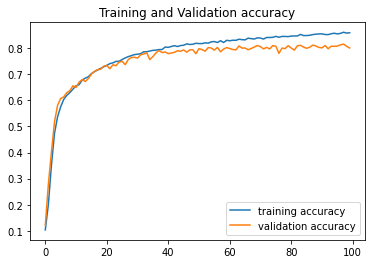

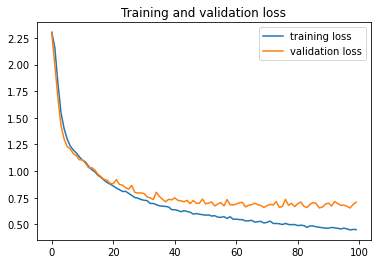

In [46]:
accuracy = auto_out.history['accuracy']
val_accuracy = auto_out.history['val_accuracy']
loss = auto_out.history['loss']
val_loss = auto_out.history['val_loss']
epochs= range(len(accuracy)) # Number of epochs
plt.plot(epochs,accuracy,label='training accuracy')
plt.plot(epochs,val_accuracy,label='validation accuracy' )
plt.title ('Training and Validation accuracy')
plt.legend(loc='Lower right')
plt.figure()

plt.plot(epochs,loss,label='training loss')
plt.plot(epochs,val_loss,label='validation loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')

We have got a final training accuracy of 81.11% which is enough for our model to work properly.
After around 20 epoch our training and validation accuracy started kind of saturating.